In [29]:
import pandas as pd
import numpy as np

In [30]:
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('train.csv')

In [32]:
df

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,136424,M22284,M,300.1,311.4,1530,37.5,210,0,0,0,0,0,0
136425,136425,H38017,H,297.5,308.5,1447,49.1,2,0,0,0,0,0,0
136426,136426,L54690,L,300.5,311.8,1524,38.5,214,0,0,0,0,0,0
136427,136427,L53876,L,301.7,310.9,1447,46.3,42,0,0,0,0,0,0


In [33]:
df.drop(['id','Product ID'],axis=1,inplace=True)

In [34]:
target_col = 'Machine failure'

num_cols = [
    'Air temperature [K]',
    'Process temperature [K]',
    'Rotational speed [rpm]',
    'Torque [Nm]',
    'Tool wear [min]'
]

binary_cols = [
    'TWF',
    'HDF',
    'PWF',
    'OSF',
    'RNF'
]


In [35]:
filtered_df = df[(df[target_col] == 1) & (df[binary_cols].sum(axis=1) == 0)]

d_columns = binary_cols + [target_col]
filtered_df = filtered_df[d_columns]

filtered_df

,TWF,HDF,PWF,OSF,RNF,Machine failure
130,0,0,0,0,0,1
228,0,0,0,0,0,1
888,0,0,0,0,0,1
1518,0,0,0,0,0,1
1806,0,0,0,0,0,1
...,...,...,...,...,...,...
134865,0,0,0,0,0,1
134955,0,0,0,0,0,1
135097,0,0,0,0,0,1
135570,0,0,0,0,0,1


In [36]:
one_hot_type = pd.get_dummies(df["Type"])

In [37]:
df.drop(['Type'],axis=1,inplace=True)

In [38]:
df = pd.concat([df,one_hot_type],axis=1)

In [39]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,0,0,1
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,1,0,0
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,0,1,0
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,0,1,0


<AxesSubplot:ylabel='Machine failure'>

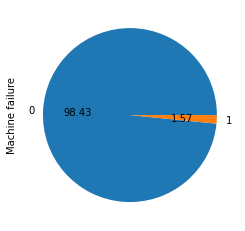

In [40]:
df[target_col].value_counts().plot(kind='pie',autopct='%.2f')

In [41]:
df.drop_duplicates(keep='first',inplace=True)

In [42]:
df.shape

(135273, 14)

In [43]:
df[target_col].value_counts()

0    133144
1      2129
Name: Machine failure, dtype: int64

In [44]:
#Temp Difference
df['Temp Difference'] = df['Process temperature [K]'] - df['Air temperature [K]']
#Power Factor
df['Power Factor'] = df['Rotational speed [rpm]'] * df['Torque [Nm]']
#Temp Ratio 
df["Temp Ratio"] = df["Process temperature [K]"]/df["Air temperature [K]"]

In [45]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
0,300.6,309.6,1596,36.1,140,0,0,0,0,0,0,0,1,0,9.0,57615.6,1.029940
1,302.6,312.1,1759,29.1,200,0,0,0,0,0,0,0,0,1,9.5,51186.9,1.031395
2,299.3,308.5,1805,26.5,25,0,0,0,0,0,0,0,1,0,9.2,47832.5,1.030738
3,301.0,310.9,1524,44.3,197,0,0,0,0,0,0,0,1,0,9.9,67513.2,1.032890
4,298.0,309.0,1641,35.4,34,0,0,0,0,0,0,0,0,1,11.0,58091.4,1.036913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,300.1,311.4,1530,37.5,210,0,0,0,0,0,0,0,0,1,11.3,57375.0,1.037654
136425,297.5,308.5,1447,49.1,2,0,0,0,0,0,0,1,0,0,11.0,71047.7,1.036975
136426,300.5,311.8,1524,38.5,214,0,0,0,0,0,0,0,1,0,11.3,58674.0,1.037604
136427,301.7,310.9,1447,46.3,42,0,0,0,0,0,0,0,1,0,9.2,66996.1,1.030494


In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
columns_to_standardize = num_cols + ['Temp Difference','Power Factor','Temp Ratio']
st = StandardScaler()

df[columns_to_standardize] = st.fit_transform(df[columns_to_standardize]) 

In [48]:
df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
0,0.395546,-0.246363,0.545666,-0.499439,0.557371,0,0,0,0,0,0,0,1,0,-1.093499,-0.294011,-1.074094
1,1.469284,1.558786,1.721283,-1.323638,1.495664,0,0,0,0,0,0,0,0,1,-0.586292,-0.968932,-0.650003
2,-0.302383,-1.040629,2.053052,-1.629769,-1.241024,0,0,0,0,0,0,0,1,0,-0.890616,-1.321095,-0.841335
3,0.610294,0.692315,0.026375,0.466051,1.448750,0,0,0,0,0,0,0,1,0,-0.180526,0.745093,-0.213862
4,-1.000313,-0.679599,0.870222,-0.581859,-1.100280,0,0,0,0,0,0,0,0,1,0.935331,-0.244059,0.958984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136424,0.127112,1.053344,0.069649,-0.334599,1.652046,0,0,0,0,0,0,0,0,1,1.239655,-0.319271,1.175151
136425,-1.268747,-1.040629,-0.528978,1.031216,-1.600703,0,0,0,0,0,0,1,0,0,0.935331,1.116165,0.977073
136426,0.341860,1.342168,0.026375,-0.216856,1.714599,0,0,0,0,0,0,0,1,0,1.239655,-0.182895,1.160536
136427,0.986102,0.692315,-0.528978,0.701537,-0.975174,0,0,0,0,0,0,0,1,0,-0.890616,0.690805,-0.912633


In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X = df.drop([target_col],axis=1)
y = df[target_col]

In [51]:
train_X,test_X,train_y,test_y = train_test_split(X,y,stratify=y,test_size=0.3)

In [52]:
train_X.shape,test_X.shape

((94691, 16), (40582, 16))

## Gradient Boosting 

In [53]:
from sklearn.ensemble import GradientBoostingClassifier


In [54]:
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score

## Under Sampling

In [55]:
false_values = df[df[target_col] == 0].sample(n=3000, random_state=42)
# Filter all true values
true_values = df[df[target_col] == 1]

# Combine the two subsets to create the new dataset
df_undersample = pd.concat([false_values, true_values])

# Shuffle the new dataset to ensure random order
df_undersample = df_undersample.sample(frac=1, random_state=40)

In [56]:
df_undersample.shape

(5129, 17)

In [57]:
df_undersample

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
116606,-0.678191,-0.174157,0.004737,0.925248,1.589493,1,0,0,0,1,0,0,1,0,1.036772,1.353904,1.035006
72359,2.059840,2.136434,0.329294,1.525736,1.495664,1,0,0,0,0,0,0,0,1,-0.890616,2.420095,-0.971186
105606,-0.731878,-0.318569,-0.456855,-0.063791,-0.709324,0,0,0,0,0,0,0,1,0,0.935331,-0.254852,0.940956
127733,-0.678191,-0.029745,2.500219,-1.877028,-1.006450,1,0,0,0,0,0,1,0,0,1.239655,-1.560221,1.230304
2303,0.180799,1.342168,0.185047,0.265889,1.073432,0,0,0,0,0,0,0,1,0,1.543980,0.571489,1.462879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38544,0.502920,0.908932,-1.243003,2.173320,1.057794,1,0,0,1,0,0,0,0,1,0.326682,1.978589,0.277188
110411,-1.161374,-0.607393,-1.120393,0.642665,-1.444320,1,0,0,0,1,0,0,1,0,1.341097,0.220565,1.361607
23615,1.684032,0.692315,-1.221366,0.489600,-0.287092,1,0,1,0,0,0,0,1,0,-2.209356,-0.031138,-2.201783
4509,0.395546,0.331285,-0.752562,2.526549,1.636408,1,0,0,0,0,0,0,1,0,-0.281967,2.844342,-0.298100


In [58]:
undersample_X = df_undersample.drop([target_col],axis=1)
undersample_y = df_undersample[target_col]

In [59]:
train_us_X,test_us_X,train_us_y,test_us_y = train_test_split(undersample_X,undersample_y,stratify=undersample_y,test_size=0.3)

In [60]:
gb_us = GradientBoostingClassifier(n_estimators=50)

In [61]:
gb_us.fit(train_us_X,train_us_y)

GradientBoostingClassifier(n_estimators=50)

In [62]:
y_us_pred = gb_us.predict(test_us_X)

In [107]:
print("Accuracy",accuracy_score(y_us_pred,test_us_y))
print("Precision",precision_score(y_us_pred,test_us_y))
print("Recall",recall_score(y_us_pred,test_us_y))
print("F1_score",f1_score(y_us_pred,test_us_y))

Accuracy 0.9194282001299545
Precision 0.8403755868544601
Recall 0.960644007155635
F1_score 0.8964941569282137


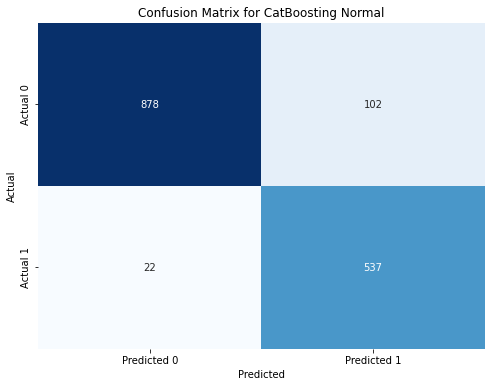

In [152]:
confusion = confusion_matrix(y_us_pred,test_us_y)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=['Predicted 0', 'Predicted 1'],
yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CatBoosting Normal')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## OverSampling

In [128]:
smote_x = pd.read_csv('smotex.csv')
smote_y = pd.read_csv('smotey.csv')

In [148]:
smote_y.value_counts()

Machine failure
0                  133144
1                  133144
dtype: int64

In [129]:
smote_y.drop(columns=["Unnamed: 0"],inplace=True)

In [135]:
smote_x.drop(columns=["Unnamed: 0"],inplace=True)

In [136]:
train_os_X, test_os_X, train_os_y, test_os_y = train_test_split(smote_x,smote_y,test_size=0.3)

In [137]:
train_os_X

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],TWF,HDF,PWF,OSF,RNF,H,L,M,Temp Difference,Power Factor,Temp Ratio
189633,1.251631,0.142820,-1.687279,3.071481,1.306370,0,1,0,0,0,False,True,False,-2.164312,2.630901,-2.138579
225377,1.469284,0.764520,-1.033277,1.079919,0.104109,0,1,0,0,0,False,False,True,-1.702149,0.815557,-1.709943
29281,-0.141322,0.692315,-0.528978,-1.005732,1.073432,0,0,0,0,0,False,True,False,1.239655,-1.511949,1.193474
208480,0.879390,0.375142,-1.313312,1.051334,-0.619666,0,0,0,0,0,False,True,False,-1.134576,0.579877,-1.139225
73102,-0.195009,0.547903,0.516816,0.089275,1.573855,0,0,0,0,0,False,True,False,1.138214,0.526513,1.099790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235114,0.845860,0.373284,-1.289440,0.921998,-0.565384,0,0,0,0,0,False,True,False,-1.073831,0.438612,-1.079641
31422,0.234486,-0.246363,-0.839110,2.361709,-0.271454,0,0,0,0,0,False,True,False,-0.789175,2.560125,-0.774085
228125,1.371163,0.267375,-1.051415,0.973021,-1.381401,0,1,0,0,0,False,False,True,-2.215184,0.671432,-2.192666
213162,0.447136,0.328464,-0.748899,0.742379,0.689079,0,0,0,0,0,False,True,False,-0.383409,0.594235,-0.398106


In [138]:
gb_os = GradientBoostingClassifier(n_estimators=50)

In [142]:
gb_os.fit(train_os_X,np.ravel(train_os_y))

GradientBoostingClassifier(n_estimators=50)

In [143]:
y_pred_os = gb_os.predict(test_os_X)

In [146]:
print("Accuracy",accuracy_score(y_pred_os,test_os_y))
print("Precision",precision_score(y_pred_os,test_os_y))
print("recall_score",recall_score(y_pred_os,test_os_y))
print("F1_score",f1_score(y_pred_os,test_os_y))

Accuracy 0.8987319588919349
Precision 0.8573790615527219
recall_score 0.9345457524371262
F1_score 0.8943008701560009


In [150]:
from sklearn.metrics import confusion_matrix

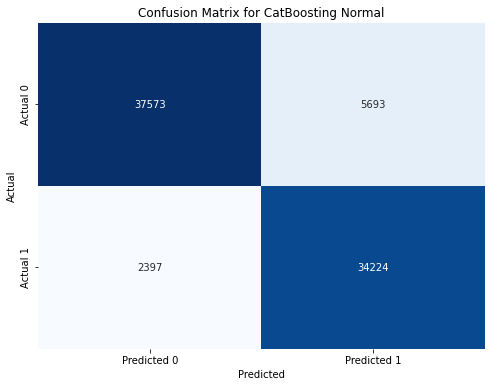

In [151]:
confusion = confusion_matrix(y_pred_os,test_os_y)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
xticklabels=['Predicted 0', 'Predicted 1'],
yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for CatBoosting Normal')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Normal

In [77]:
gb = GradientBoostingClassifier(n_estimators=100)

In [78]:
gb.fit(train_X,train_y)

GradientBoostingClassifier()

In [79]:
y_pred = gb.predict(test_X)


In [110]:
print("Accuracy",accuracy_score(y_pred,test_y))
print("Precision",precision_score(y_pred,test_y))
print("recall_score",(y_pred,test_y))
print("F1_score",f1_score(y_pred,test_y))

Accuracy 0.9956631018678231
Precision 0.7652582159624414
Recall 0.9495145631067962
F1_score 0.8474870017331023


## Cross Validation before Hyper Parameter Tuning

In [68]:
from sklearn.model_selection import cross_val_score

In [69]:
from sklearn.model_selection import KFold

In [70]:
kf = KFold(n_splits=5, shuffle=False)

In [83]:
from statistics import stdev
score = cross_val_score(gb, train_X, train_y, cv=kf, scoring='recall')
gb_cv_score = score.mean()
gb_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', gb_cv_score)
print('Cross Validation Recall standard deviation: ', gb_cv_stdev)

Cross Validation Recall scores are: [0.7202163, 0.76175549, 0.7311684, 0.72304965, 0.74393148]
Average Cross Validation Recall score:  0.7345999326552113
Cross Validation Recall standard deviation:  0.0195477322119885


## Hyper Parameter Tuning

In [72]:
from sklearn.model_selection import GridSearchCV
gb_classifier = GradientBoostingClassifier(random_state=42)

In [73]:
param_grid = {
    'n_estimators': [50,100],
    'max_depth': [3,4,5],
    'max_leaf_nodes': [16,32]
}

grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='f1')

grid_search.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'max_depth': [3, 4, 5], 'max_leaf_nodes': [16, 32],
                         'n_estimators': [50, 100]},
             scoring='f1')

In [74]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'max_depth': 3, 'max_leaf_nodes': 16, 'n_estimators': 50}


In [75]:
best_gb_classifier = grid_search.best_estimator_
best_gb_classifier.fit(train_X, train_y)

GradientBoostingClassifier(max_leaf_nodes=16, n_estimators=50, random_state=42)

## Cross Validation After Hyper Parameter Tuning

In [76]:
score = cross_val_score(best_gb_classifier, train_X, train_y, cv=kf, scoring='recall')
gb_cv_score = score.mean()
gb_cv_stdev = stdev(score)
print('Cross Validation Recall scores are: {}'.format(score))
print('Average Cross Validation Recall score: ', gb_cv_score)
print('Cross Validation Recall standard deviation: ', gb_cv_stdev)

Cross Validation Recall scores are: [0.7492163  0.75548589 0.77302632 0.77304965 0.79699248]
Average Cross Validation Recall score:  0.7695541273479838
Cross Validation Recall standard deviation:  0.018632501107953878


## Testing

In [84]:
y_pred_new = best_gb_classifier.predict(test_X)

In [149]:
print("Accuracy:",accuracy_score(y_pred_new,test_y))
print("Precision Score",precision_score(y_pred_new,test_y))
print("Recall",recall_score(y_pred_new,test_y))
print("F1 Score",f1_score(y_pred_new,test_y))

Accuracy: 0.9958109506677838
Precision Score 0.7621283255086072
Recall 0.9643564356435643
F1 Score 0.8513986013986014


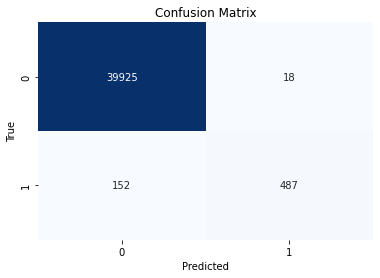

In [86]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
confusion_mat = confusion_matrix(test_y, y_pred_new)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


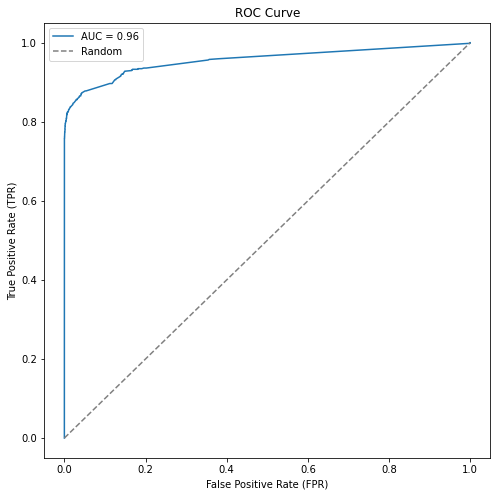

In [106]:
from sklearn.metrics import roc_curve, roc_auc_score

best_gb_classifier.fit(train_X, train_y)

y_probs = best_gb_classifier.predict_proba(test_X)[:,1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(test_y, y_probs)
auc = roc_auc_score(test_y, y_probs)

# Plot the ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.show()